# Analysis of bike-share usage in London and Taipei

Programming Tools for Urban Analytics, Univeristy of Glasgow, 26.03.2023

## 1.Introduction
The purpose of this study is to conduct an exploratory analysis of bike-share usage datasets from London and Taipei.
As is common knowledge, London is a typical European metropolis and Taipei is the economic centre of Taiwan. Both cities have a high population density and the ability to drive the sharing economy, making them leaders in urban technological practise.Few studies have examined the homogeneity and heterogeneity of bike-share systems in various cities, despite the fact that numerous scholars have evaluated the applicability of bike-share systems and the factors influencing demand.

Instead of focusing on linear regression models or the geographic distribution of bike-share stations, this piece compares and contrasts datasets from two cities, selecting only relevant information for analysis. Possible factors affecting the findings would be discussed in depth in order to provide context for observing the trend of datasets. The procedure was undertaken not to complete a specific project but rather to identify data sources and determine the next course of action.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
london=pd.read_csv(r'C:\Users\doudou\Desktop\Dataset\london.csv')
taipei=pd.read_csv(r'C:\Users\doudou\Desktop\Dataset\taipei.csv')

## 2.Literature Review

To begin, we need to determine what exactly bike-share is and investigate the urbanization processes that are involved with it. 

It is clear that bike-sharing systems were originally designed for intense utilitarian use with throughout the city centre, as evidenced by the failure of the White Bikes project in Amsterdam in 1965 and the City Bikes attempt in Copenhagen in 1995( DeMaio, 2009). In 2008, nations in East Asia and the United States implemented bike-sharing programs in response to the success of similar initiatives in Europe. 

Since the emergence of this new trend, numerous researchers have joined the investigation and study. Regarding social equity, Rixey(2013) emphasised that crucial variables in estimating bike-sharing ridership included population density, retail employment density, the percentage of alternative commuters, etc. In addition, according to Bachand-Marleau's (2012) investigation into the factors that influence residents' propensity and predilection for using bike-share systems, the location of shared bicycle stations is not the only factor that influences their decision; cycling experiences and advertising also play a role. Alternatively, Eren(2020) summarized factors affecting bike-sharing demand: weather, built environment, land use, public transportation, station level, social status, safety etc.

However, even if a bike-share system is associated with a reduction in carbon dioxide emissions, its future development is questioned.  Within segments of socio-technical innovation, socio-technical transitions research has typically assumed a clear distinction between grassroots organizations and for-profit organizations(Martin, 2015). Henriksson(2023) emphasized that commercial bike sharing is more likely to support ecological elements of circularity, while government-run bike share programs may support social aspects. While that is not the only limitation on the future of bike-share, as stated previously, bike-share systems were designed to alleviate the pressure on city centres. However, the size of the system is dependent on the size of the city, which means that regardless of whether the system is for profit or not, it will decline in tandem with the urban decline.

Despite this, there are few studies that examine the homogeneity and heterogeneity of bike-share systems in various cities. Consequently, this paper will conduct exploratory analysis in London and Taipei.

## 3.Data 
### 3.1.Data sources

The dataset used for the analysis is from 'Bike-Share Usage in London and Taipei Network(Spatiotemporal urban transport data in a network of bike station)' in Kaggle (https://www.kaggle.com/datasets/ajohrn/bikeshare-usage-in-london-and-taipei-network). London and Taipei, two major metropolitan areas with extensive bike-share programs, are represented in this dataset.

In [3]:
london.head()

,rental_id,duration,bike_id,end_rental_date_time,end_station_id,end_station_name,start_rental_date_time,start_station_id,start_station_name
0,61343322,60.0,12871.0,2016-12-28 00:01:00,660.0,"West Kensington Station, West Kensington",2016-12-28 00:00:00,633,"Vereker Road North, West Kensington"
1,61343321,300.0,2837.0,2016-12-28 00:05:00,763.0,"Mile End Park Leisure Centre, Mile End",2016-12-28 00:00:00,531,"Twig Folly Bridge, Mile End"
2,61343323,360.0,1269.0,2016-12-28 00:06:00,99.0,"Old Quebec Street, Marylebone",2016-12-28 00:00:00,116,"Little Argyll Street, West End"
3,61343325,1140.0,4208.0,2016-12-28 00:20:00,468.0,"Cantrell Road, Bow",2016-12-28 00:01:00,443,"Philpot Street, Whitechapel"
4,61343324,NaN,1406.0,NaN,NaN,NaN,2016-12-28 00:01:00,319,"Baldwin Street, St. Luke's"


In [4]:
taipei.head()

,Unnamed: 0,start_rental_date_hour,end_rental_date_hour,duration,start_date,start_station_name_pinyin,end_station_name_pinyin
0,0,2017-01-01 00:00:00,2017-01-01 00:00:00,2847.0,2017-01-01 00:00:00,jieyunshandaosizhan(1haochukou),jieyunjiangzicuizhan(3haochukou)
1,1,2017-01-01 00:00:00,2017-01-01 01:00:00,548.0,2017-01-01 00:00:00,songshanchezhan,jieyunkunyangzhan(1haochukou)
2,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1832.0,2017-01-01 00:00:00,jieyunjiannanluzhan(2haochukou),jieyungangqizhan(2haochukou)
3,3,2017-01-01 00:00:00,2017-01-01 01:00:00,2404.0,2017-01-01 00:00:00,jieyungangqizhan(2haochukou),jieyundonghuzhan
4,4,2017-01-01 00:00:00,2017-01-01 00:00:00,678.0,2017-01-01 00:00:00,guandugong,jieyunzhuweizhan


Since the focus of this paper is on analysing and comparing the time series of datasets and the prominence of radio stations, it is necessary to eliminate certain irrelevant material.

In [7]:
london=london[["start_rental_date_time","end_rental_date_time","duration","start_station_name","end_station_name"]]
taipei=taipei[["start_rental_date_hour","end_rental_date_hour","duration","start_date","start_station_name_pinyin","end_station_name_pinyin"]]

In [8]:
london.head()

,start_rental_date_time,end_rental_date_time,duration,start_station_name,end_station_name
0,2016-12-28 00:00:00,2016-12-28 00:01:00,60.0,"Vereker Road North, West Kensington","West Kensington Station, West Kensington"
1,2016-12-28 00:00:00,2016-12-28 00:05:00,300.0,"Twig Folly Bridge, Mile End","Mile End Park Leisure Centre, Mile End"
2,2016-12-28 00:00:00,2016-12-28 00:06:00,360.0,"Little Argyll Street, West End","Old Quebec Street, Marylebone"
3,2016-12-28 00:01:00,2016-12-28 00:20:00,1140.0,"Philpot Street, Whitechapel","Cantrell Road, Bow"
4,2016-12-28 00:01:00,NaN,NaN,"Baldwin Street, St. Luke's",NaN


In [9]:
taipei.head()

,start_rental_date_hour,end_rental_date_hour,duration,start_date,start_station_name_pinyin,end_station_name_pinyin
0,2017-01-01 00:00:00,2017-01-01 00:00:00,2847.0,2017-01-01 00:00:00,jieyunshandaosizhan(1haochukou),jieyunjiangzicuizhan(3haochukou)
1,2017-01-01 00:00:00,2017-01-01 01:00:00,548.0,2017-01-01 00:00:00,songshanchezhan,jieyunkunyangzhan(1haochukou)
2,2017-01-01 00:00:00,2017-01-01 00:00:00,1832.0,2017-01-01 00:00:00,jieyunjiannanluzhan(2haochukou),jieyungangqizhan(2haochukou)
3,2017-01-01 00:00:00,2017-01-01 01:00:00,2404.0,2017-01-01 00:00:00,jieyungangqizhan(2haochukou),jieyundonghuzhan
4,2017-01-01 00:00:00,2017-01-01 00:00:00,678.0,2017-01-01 00:00:00,guandugong,jieyunzhuweizhan


In [10]:
london.tail()

,start_rental_date_time,end_rental_date_time,duration,start_station_name,end_station_name
38215555,2020-09-01 23:49:00,2020-09-01 23:53:00,240.0,"Addison Road, Holland Park","Evesham Street, Avondale"
38215556,2020-09-01 23:50:00,2020-09-01 23:51:00,60.0,"Wapping Lane, Wapping","Reardon Street, Wapping"
38215557,2020-09-01 23:51:00,2020-09-01 23:59:00,480.0,"Walmer Road, Avondale","Walmer Road, Avondale"
38215558,2020-09-01 23:54:00,2020-09-01 23:59:00,300.0,"Leman Street, Aldgate","Sutton Street, Shadwell"
38215559,2020-09-01 23:54:00,2020-09-01 23:58:00,240.0,"Harrowby Street, Marylebone","Paddington Street, Marylebone"


In [11]:
taipei.tail()

,start_rental_date_hour,end_rental_date_hour,duration,start_date,start_station_name_pinyin,end_station_name_pinyin
59097546,2019-09-17 17:00:00,2019-09-17 18:00:00,641.0,2019-09-17 00:00:00,jieyunshizhengfuzhan(3haochukou),jieyunguofujinianguanzhan(2haochukou)
59097547,2019-09-17 17:00:00,2019-09-17 18:00:00,538.0,2019-09-17 00:00:00,jieyunsongjiangnanjingzhan(7haochukou),taibeizhuanyunzhan
59097548,2019-09-17 17:00:00,2019-09-17 17:00:00,244.0,2019-09-17 00:00:00,jieyundaansenlingongyuanzhan,taibeishilitushuguan(zongguan)
59097549,2019-09-17 17:00:00,2019-09-17 17:00:00,583.0,2019-09-17 00:00:00,zhouzierhaogongyuan,ruihuyangguangjiekou
59097550,2019-09-17 17:00:00,2019-09-17 17:00:00,377.0,2019-09-17 00:00:00,luosifujinglongjiekou,xingfenggongyuan


In [12]:
len(london)

38215560

In [13]:
len(taipei)

59097551

In [14]:
london.groupby("start_station_name")["start_station_name"].count()

start_station_name
Abbey Orchard Street, Westminster    57435
Abbotsbury Road, Holland Park        17285
Aberdeen Place, St. John's Wood      26971
Aberfeldy Street, Poplar              9254
Abingdon Green, Westminster          71034
                                     ...  
Wright's Lane, Kensington            68578
Wynne Road, Stockwell                12745
York Hall, Bethnal Green             58171
York Way, Camden                         1
York Way, Kings Cross                18648
Name: start_station_name, Length: 839, dtype: int64

In [15]:
london.groupby("end_station_name")["end_station_name"].count()

end_station_name
Abbey Orchard Street, Westminster    70405
Abbotsbury Road, Holland Park        16417
Aberdeen Place, St. John's Wood      21634
Aberfeldy Street, Poplar              9083
Abingdon Green, Westminster          85748
                                     ...  
Wright's Lane, Kensington            71892
Wynne Road, Stockwell                13078
York Hall, Bethnal Green             56056
York Way, Camden                         1
York Way, Kings Cross                16718
Name: end_station_name, Length: 840, dtype: int64

In [16]:
taipei.groupby("start_station_name_pinyin")["start_station_name_pinyin"].count()

start_station_name_pinyin
?gonggongyuan                            172823
@ECCceshizhan(dingqipiaoyuzhuancheng)         1
@YBxuefataibeiceshizhan                      24
@jieyunzhongshanzhan(4haochukou)             51
@jinghuajie128xiangkou                        1
                                          ...  
zhulunshangchang                         140874
zhuweigongyuan                                4
zilaishuiyuanqu                          246264
ziqiangxiweijiekou                           11
zirangongyuan                                 3
Name: start_station_name_pinyin, Length: 872, dtype: int64

In [17]:
taipei.groupby("end_station_name_pinyin")["end_station_name_pinyin"].count()

end_station_name_pinyin
?gonggongyuan              167876
?linguoxiao                     3
@MP-Taipei Test1                1
@YBxuefataibeiceshizhan        24
@kefuhuawuzhongxin(3F)          2
                            ...  
zhuweigongyuan               3104
zilaishuiyuanqu            171227
ziqiangxiweijiekou           4280
zirangongyuan                2141
ziyungong                       1
Name: end_station_name_pinyin, Length: 1118, dtype: int64

As demonstrated previously, these two datasets comprise a vast quantity of bike-share usage records. The dataset of London bike-share usage spans from December 28, 2016 to September 1, 2020 and comprises 38215560 records. In contrast, the scale of data pertaining to Taipei bike-share utilisation is significantly larger, containing 59097551 records from 1st January,2017 to 17th September,2019, which is 54.64% more than the London dataset. 

Despite the extended time interval, it appears that London residents have a lower propensity to utilise bike-share programmes. However, given that Taipei has more bike-share stations, this may be reasonable. The paper will discuss the further investigation into the homogeneity and heterogeneity of bike-share systems in these two cities.

### 3.2.Data cleaning

#### 3.2.1.Dropping Missing Values

As seen above, the entire dataset contains numerous absent values that must be removed from the dataframe.

In [18]:
london=london.dropna()

In [19]:
len(london)

38147278

In [20]:
taipei=taipei.dropna()

In [21]:
len(taipei)

59097514

By removing invalid values, the number of London bike-share records dropped from 38,215,560 to 38,147,278, a mere 0.18% decrease. Also, for Taipei, the number of records decreased from 59,097,551 to 59,097,514, with the loss of only 37 records. Therefore, the accounts of information in both datasets are reliable.

#### 3.2.2.Eliminating Unusual Values

Due to the large size, it is necessary to eliminate outliers that affect the entire distribution of datasets; therefore, boxplot is an effective method for identifying outliers and data distribution. Before that, however, the negative records that appeared strange should also be deleted. 

In [22]:
print(london["duration"].max(),london["duration"].min(),london["duration"].mean())

1984694.0 -3360.0 1286.2330723833036


In [23]:
print(taipei["duration"].max(),taipei["duration"].min(),taipei["duration"].mean())

5184000.0 1.0 1312.489770297275


Clearly, the statistics were not as reliable as claimed, as the longest bike-share duration exceeded two weeks and the shortest duration was less than three minute. These records do not merit investigation, so they must be removed.

In [49]:
london=london[london["duration"]>180]
taipei=taipei[taipei["duration"]>180]

Text(0.5, 1.0, 'Bike-share usage duration in London')

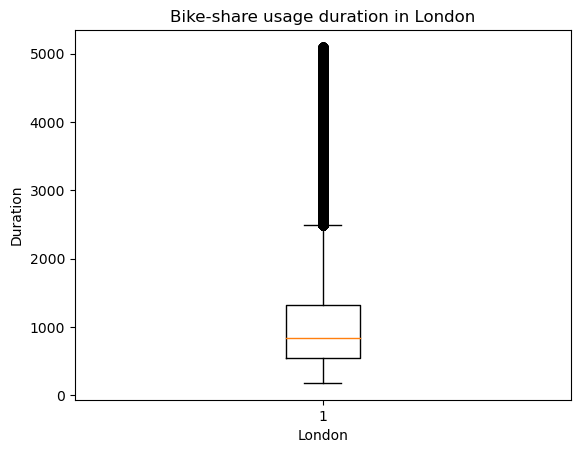

In [50]:
plt.boxplot(london["duration"])
plt.xlabel("London")
plt.ylabel("Duration")
plt.title("Bike-share usage duration in London")

Text(0.5, 1.0, 'Bike-share usage duration in Taipei')

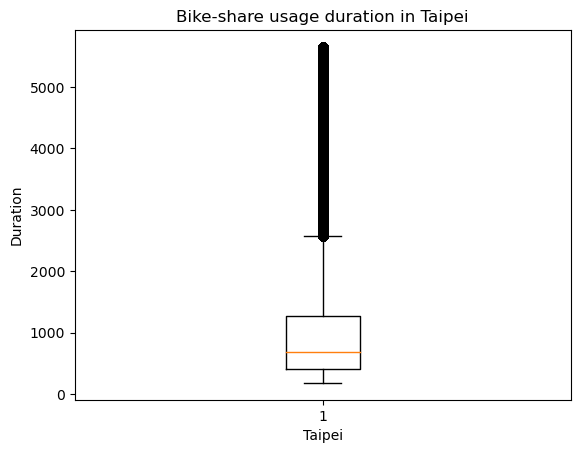

In [51]:
plt.boxplot(taipei["duration"])
plt.xlabel("Taipei")
plt.ylabel("Duration")
plt.title("Bike-share usage duration in Taipei")

It's clear that data with a length of less than three minute is not reliable, but setting an upper limit can be tricky; to help with this, a boxplot-based function for removing outliers was developed.

In [52]:
def box_plot_outliners(data,box_scale):
    iqr=box_scale*(data.quantile(0.75)-data.quantile(0.25))
    val_low=data.quantile(0.25)-iqr*1.5
    val_up=data.quantile(0.75)+iqr*1.5
    outliner=data[(data<val_low)|(data>val_up)]
    normal_value=data[(data>val_low)&(data<val_up)]
    return outliner,normal_value,(val_low,val_up)

Text(0.5, 1.0, 'Bike-share usage duration in London')

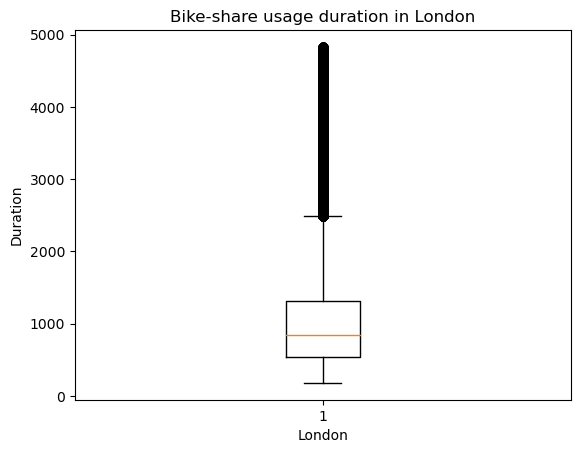

In [53]:
london_outliner,london_normal_value,london_value=box_plot_outliners(london["duration"],3)

plt.boxplot(london_normal_value)
plt.xlabel("London")
plt.ylabel("Duration")
plt.title("Bike-share usage duration in London")

In [54]:
len(london_outliner)

75274

In [55]:
london=london[london["duration"].isin(london_normal_value)]

In [56]:
len(london)

35547396

In [57]:
print(london["duration"].max(),london["duration"].min(),london["duration"].mean(),london["duration"].median())

4829.0 181.0 1028.7809831133623 840.0


Text(0.5, 1.0, 'Bike-share usage duration in Taipei')

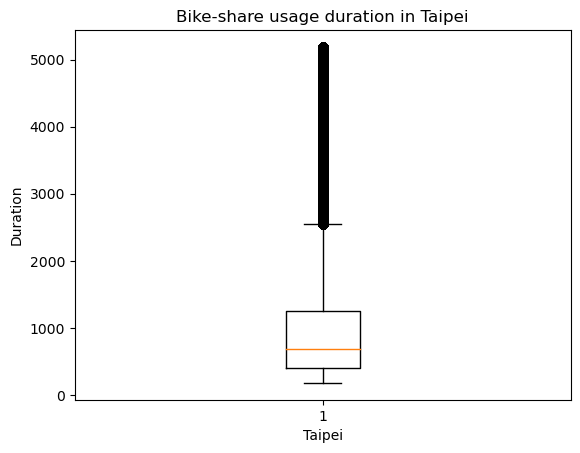

In [59]:
taipei_outliner,taipei_normal_value,taipei_value=box_plot_outliners(taipei["duration"],3)

plt.boxplot(taipei_normal_value)
plt.xlabel("Taipei")
plt.ylabel("Duration")
plt.title("Bike-share usage duration in Taipei")

In [60]:
len(taipei_outliner)

335660

In [61]:
taipei=taipei[taipei["duration"].isin(taipei_normal_value)]

In [62]:
len(taipei)

55366937

In [63]:
print(taipei["duration"].max(),taipei["duration"].min(),taipei["duration"].mean(),taipei["duration"].median())

5189.0 181.0 1015.0190825799159 687.0


The data scale of London decreased from 38,147,278 to 35,547,396, a reduction of 6.8%, as shown in the preceding section. Moreover, Taipei's population decreased from 59,097,514 to 55,366,937, a decrease of 6.3%. It appears normal in terms of utmost value and minimum value, and the mean value of two cities tends to be comparable. Furthermore, it is evident that Taipei's dataset has a much lower median value than London's, which is an intriguing phenomenon to investigate.

In [64]:
# Because of the former steps, I stored the cleaned data for next steps.
london.to_csv(r'C:\Users\doudou\Desktop\Dataset\london_cleaned.csv')
taipei.to_csv(r'C:\Users\doudou\Desktop\Dataset\taipei_cleaned.csv')

## 4.Exploratory analysis
### 4.1.Monthly Bike-share 

One difference between the London and Taipei datasets is that the London dataset precisely recorded rental time, while the Taipei dataset only provided a time interval. However, it is necessary to partition the time series for both datasets and investigate them separately.

In [2]:
# Because of the former steps, I pulled up the cleaned data for next steps.
london=pd.read_csv(r'C:\Users\doudou\Desktop\Dataset\london_cleaned.csv')

#### 4.1.1. Monthly Bike-share in London

In [4]:
# Splitting date and time in London dataset
dates=[0]
times=[0]
for datestr in london["start_rental_date_time"]:
    parts=datestr.split(" ")
    date,time=parts[0],parts[1]
    dates.append(date)
    times.append(time)

dates_1=dates[1:]
times_1=times[1:]
london["date"]=dates_1
london["time"]=times_1


In [5]:
# Splitting year,month,hour in London dataset
years=[0]
months=[0]
for datestr in london["date"]:
    parts=datestr.split("-")
    year,month=parts[0],parts[1]
    years.append(year)
    months.append(month)

years_1=years[1:]
months_1=months[1:]
london["year"]=years_1
london["month"]=months_1

hours=[0]
for datestr in london["time"]:
    parts=datestr.split(":")
    hour=parts[0]
    hours.append(hour)

hours_1=hours[1:]
london["hour"]=hours_1

Due to the massive size of the data, it was intended to be split up by year as follows.
Regarding the very tiny scale, datasets from 2016 and September 2020 have been disregarded.

In [6]:
london_2017=london.loc[london["start_rental_date_time"].str.contains("2017")]
london_2018=london.loc[london["start_rental_date_time"].str.contains("2018")]
london_2019=london.loc[london["start_rental_date_time"].str.contains("2019")]
london_2020=london.loc[london["start_rental_date_time"].str.contains("2020")]

In [7]:
london_2017.groupby("month")["month"].count()

month
01     596453
02     575342
03     763078
04     843818
05     919998
06    1019936
07    1047524
08     923592
09     865506
10     904289
11     735315
12     490771
Name: month, dtype: int64

In [9]:
london_2017_month_count=[596453,575342,763078,843818,919998,1019936,1047524,923592,865506,904289,735315,490771]

In [47]:
london_2018.groupby("month")["month"].count()

month
01     597705
02     531339
03     556554
04     756159
05    1021061
06    1090782
07    1156112
08     974329
09     935511
10     908243
11     684477
12     537396
Name: month, dtype: int64

In [10]:
london_2018_month_count=[597705,531339,556554,756159,1021061, 1090782,1156112,974329,935511,908243,684477,537396]

In [49]:
london_2019.groupby("month")["month"].count()

month
01     636330
02     646190
03     733004
04     815764
05     930571
06     925332
07    1063866
08     967708
09     896134
10     791252
11     678420
12     544927
Name: month, dtype: int64

In [11]:
london_2019_month_count=[636330,646190,733004,815764,930571,925332,1063866,967708, 896134,791252, 678420,544927]

In [51]:
london_2020.groupby("month")["month"].count()

month
01     658498
02     594453
03     511470
04     511588
05     952428
06    1033458
07    1077157
08    1064024
09      33706
Name: month, dtype: int64

In [12]:
london_2020_month_count=[658498,594453,511470,511588,952428,1033458,1077157,1064024,0,0,0,0]

The dataset, once disentangled, took on the shape of a regular circular; as spring and summer approached, more and more people rode bicycles outside. At the same time, as the weather dropped, people stopped venturing outside.However, the pattern cannot be accurately represented numerically; therefore, visual representation is required.

In [15]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]
df=pd.DataFrame(months,index=months)
df["2017"]=london_2017_month_count
df["2018"]=london_2018_month_count
df["2019"]=london_2019_month_count
df["2020"]=london_2020_month_count


([<matplotlib.axis.YTick at 0x23d37e1cd30>,
 [Text(0, 0, '0'),
  Text(0, 200000, '200,000'),
  Text(0, 400000, '400,000'),
  Text(0, 600000, '600,000'),
  Text(0, 800000, '800,000'),
  Text(0, 1000000, '1,000,000')])

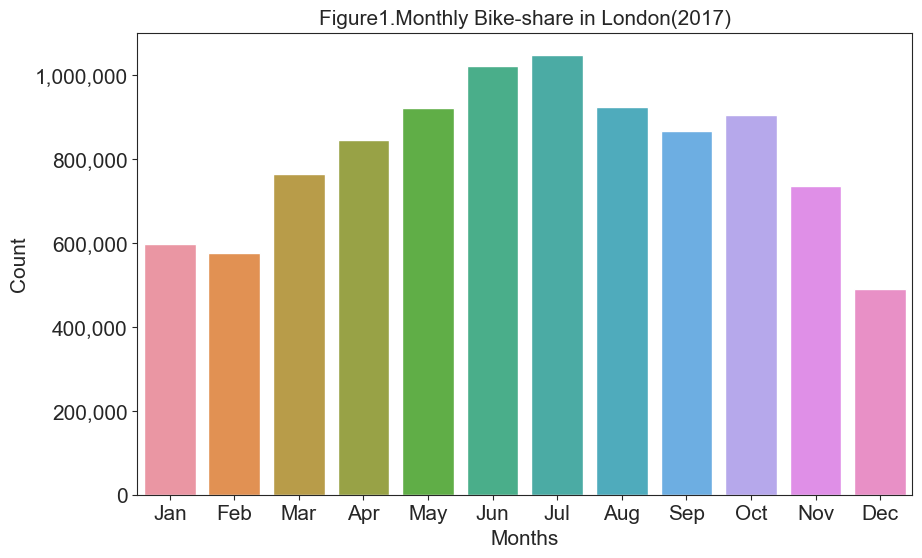

In [200]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df.index,y='2017',data=df)
ax.set_title('Figure1.Monthly Bike-share in London(2017)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Months', fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=15)
plt.yticks([0,200000,400000,600000,800000,1000000],["0","200,000","400,000","600,000","800,000","1,000,000"],fontsize=15)

([<matplotlib.axis.YTick at 0x1f410ae69d0>,
 [Text(0, 0, '0'),
  Text(0, 200000, '200,000'),
  Text(0, 400000, '400,000'),
  Text(0, 600000, '600,000'),
  Text(0, 800000, '800,000'),
  Text(0, 1000000, '1,000,000')])

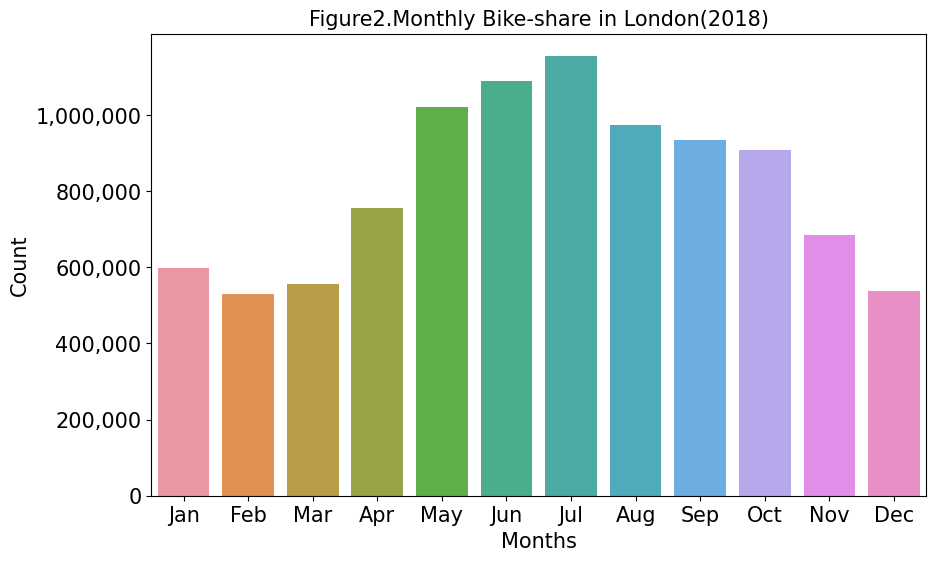

In [29]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df.index,y='2018',data=df)
ax.set_title('Figure2.Monthly Bike-share in London(2018)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Months', fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=15)
plt.yticks([0,200000,400000,600000,800000,1000000],["0","200,000","400,000","600,000","800,000","1,000,000"],fontsize=15)

([<matplotlib.axis.YTick at 0x1f410d8cb20>,
 [Text(0, 0, '0'),
  Text(0, 200000, '200,000'),
  Text(0, 400000, '400,000'),
  Text(0, 600000, '600,000'),
  Text(0, 800000, '800,000'),
  Text(0, 1000000, '1,000,000')])

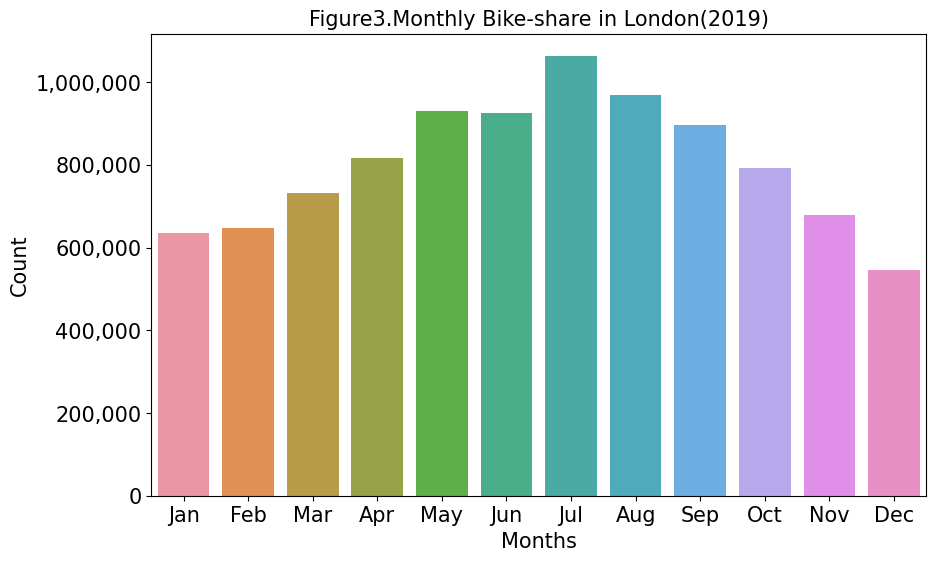

In [30]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df.index,y='2019',data=df)
ax.set_title('Figure3.Monthly Bike-share in London(2019)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Months', fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=15)
plt.yticks([0,200000,400000,600000,800000,1000000],["0","200,000","400,000","600,000","800,000","1,000,000"],fontsize=15)

([<matplotlib.axis.YTick at 0x1f410e2fdc0>,
 [Text(0, 0, '0'),
  Text(0, 200000, '200,000'),
  Text(0, 400000, '400,000'),
  Text(0, 600000, '600,000'),
  Text(0, 800000, '800,000'),
  Text(0, 1000000, '1,000,000')])

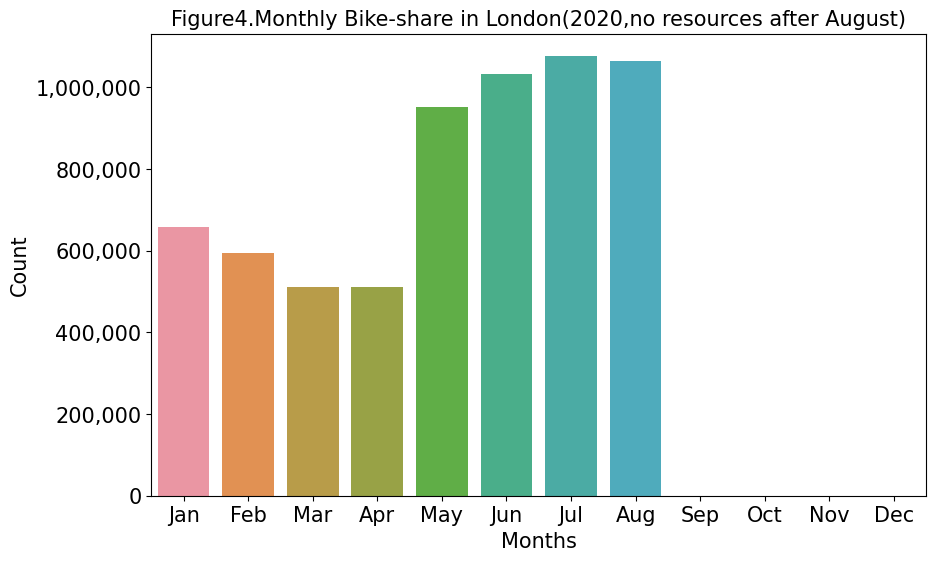

In [31]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df.index,y='2020',data=df)
ax.set_title('Figure4.Monthly Bike-share in London(2020,no resources after August)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Months', fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=15)
plt.yticks([0,200000,400000,600000,800000,1000000],["0","200,000","400,000","600,000","800,000","1,000,000"],fontsize=15)

Four diagrams finally appeared to illustrate the annual change in bike-share usage.

Typically, the maximum value occurred in July and the minimum value in December. During peak months, bike-share utilisation may double compared to the off-season. In general, bike-share usage rises steadily from February to July, levels off, and then declines gradually from August to December, following like a normal distribution.

As can be seen from the charts, the seasonal and climatic factors have a significant impact on the number of people choosing to ride bicycles in Britain.

Nevertheless, the COVID-19 had a profound effect on Londoners' way of life. From the fourth graph, it was evident that the normal trend had been disrupted, as bike-share utilisation in March and April was even lower than in February, which was directly related to the lockdown and the rapid spread of the virus. Alternately, in May, residents utilised bike-share as usual, indicating that the quarantine was lifted and the threat posed by the virus was less severe than before.

#### 4.1.2. Monthly Bike-share in Taipei

In [1]:
# Same for Taipei dataset, but when the two datasets worked together the system would crash, so I opened another jupyter notebook and processed data there.
# Here are the codes.
# dates=[0]
# times=[0]
# for datestr in taipei["start_rental_date_hour"]:
#    parts=datestr.split(" ")
#    date,time=parts[0],parts[1]
#    dates.append(date)
#    times.append(time)

# dates_1=dates[1:]
# times_1=times[1:]
# taipei["date"]=dates_1
# taipei["time"]=times_1

# years=[0]
# months=[0]
# for datestr in taipei["date"]:
#    parts=datestr.split("-")
#    year,month=parts[0],parts[1]
#    years.append(year)
#    months.append(month)

# years_1=years[1:]
# months_1=months[1:]
# taipei["year"]=years_1
# taipei["month"]=months_1

# hours=[0]
# for datestr in taipei["time"]:
#    parts=datestr.split(":")
#    hour=parts[0]
#    hours.append(hour)

# hours_1=hours[1:]
# taipei["hour"]=hours_1

# taipei_2017=taipei.loc[taipei["start_rental_date_hour"].str.contains("2017")]
# taipei_2018=taipei.loc[taipei["start_rental_date_hour"].str.contains("2018")]
# taipei_2019=taipei.loc[taipei["start_rental_date_hour"].str.contains("2019")]

# taipei_2017.to_csv(r'C:\Users\doudou\Desktop\Dataset\taipei_2017.csv')
# taipei_2018.to_csv(r'C:\Users\doudou\Desktop\Dataset\taipei_2018.csv')
# taipei_2019.to_csv(r'C:\Users\doudou\Desktop\Dataset\taipei_2019.csv')

In [2]:
taipei_2017=pd.read_csv(r'C:\Users\doudou\Desktop\Dataset\taipei_2017.csv')
taipei_2018=pd.read_csv(r'C:\Users\doudou\Desktop\Dataset\taipei_2018.csv')
taipei_2019=pd.read_csv(r'C:\Users\doudou\Desktop\Dataset\taipei_2019.csv')

In [3]:
taipei_2017.groupby("month")["month"].count()

month
1     1461090
2     1349196
3     1463021
4      321558
5     1878446
6     1325425
7     1831092
8     1934055
9     1823002
10    1574712
11     390465
12    1612532
Name: month, dtype: int64

In [4]:
taipei_2018.groupby("month")["month"].count()

month
1     1464828
2     1016022
3     2000614
4     2008720
5     2401097
6     2148731
7     2271476
8      420153
9      902524
10    2018120
11    2160542
12    1871761
Name: month, dtype: int64

In [5]:
taipei_2019.groupby("month")["month"].count()

month
1    2131510
2    1734582
3    2018822
4    2210463
5    2220954
6    1677346
7    2306122
8    2206453
9    1211503
Name: month, dtype: int64

In [6]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]
df2=pd.DataFrame(months,index=months)
df2["2017"]=[1461090,1349196,1463021,321558,1878446,1325425,1831092,1934055,1823002,1574712,390465,1612532]
df2["2018"]=[1464828,1016022,2000614,2008720,2401097,2148731,2271476,420153,902524,2018120,2160542,1871761]
df2["2019"]=[2131510,1734582,2018822,2210463,2220954,1677346,2306122,2206453,1211503,0,0,0]


([<matplotlib.axis.YTick at 0x1f5793f9490>,
 [Text(0, 0, '0'),
  Text(0, 300000, '300,000'),
  Text(0, 600000, '600,000'),
  Text(0, 900000, '900,000'),
  Text(0, 1200000, '1,200,000'),
  Text(0, 1500000, '1,500,000'),
  Text(0, 1800000, '1,800,000')])

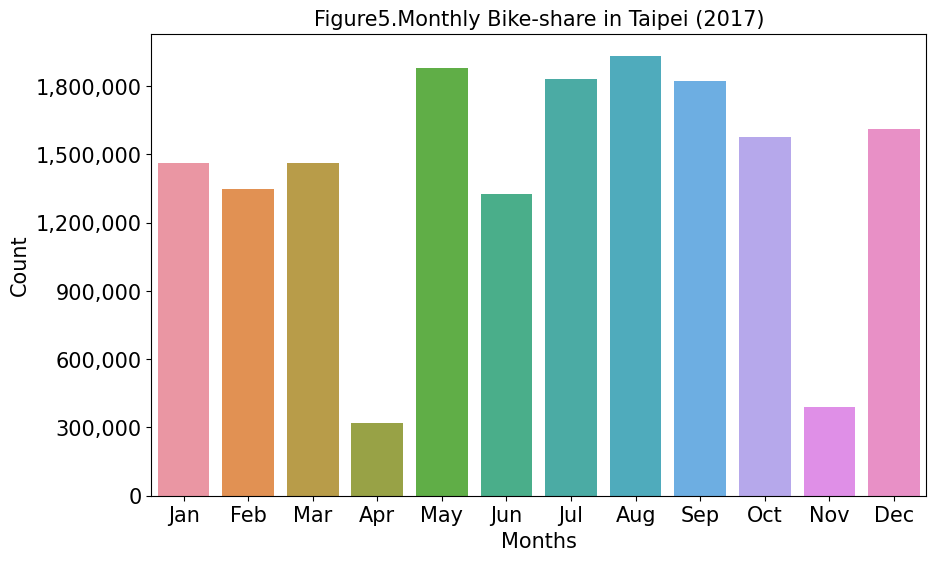

In [16]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df2.index,y='2017',data=df2)
ax.set_title('Figure5.Monthly Bike-share in Taipei (2017)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Months', fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=15)
plt.yticks([0,300000,600000,900000,1200000,1500000,1800000],["0","300,000","600,000","900,000","1,200,000","1,500,000","1,800,000"],fontsize=15)

([<matplotlib.axis.YTick at 0x1f579494a30>,
 [Text(0, 0, '0'),
  Text(0, 300000, '300,000'),
  Text(0, 600000, '600,000'),
  Text(0, 900000, '900,000'),
  Text(0, 1200000, '1,200,000'),
  Text(0, 1500000, '1,500,000'),
  Text(0, 1800000, '1,800,000')])

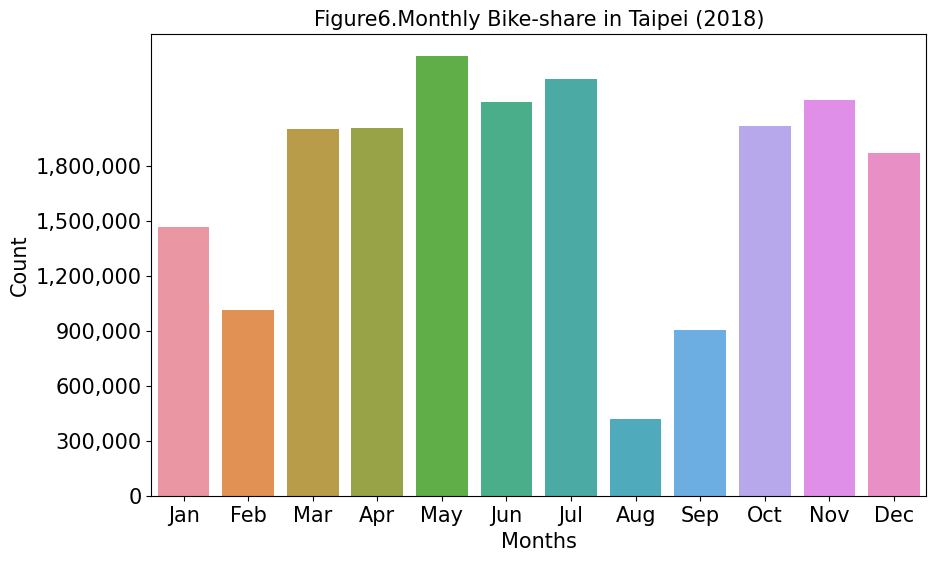

In [17]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df2.index,y='2018',data=df2)
ax.set_title('Figure6.Monthly Bike-share in Taipei (2018)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Months', fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=15)
plt.yticks([0,300000,600000,900000,1200000,1500000,1800000],["0","300,000","600,000","900,000","1,200,000","1,500,000","1,800,000"],fontsize=15)

([<matplotlib.axis.YTick at 0x1f579ec3a00>,
 [Text(0, 0, '0'),
  Text(0, 300000, '300,000'),
  Text(0, 600000, '600,000'),
  Text(0, 900000, '900,000'),
  Text(0, 1200000, '1,200,000'),
  Text(0, 1500000, '1,500,000'),
  Text(0, 1800000, '1,800,000')])

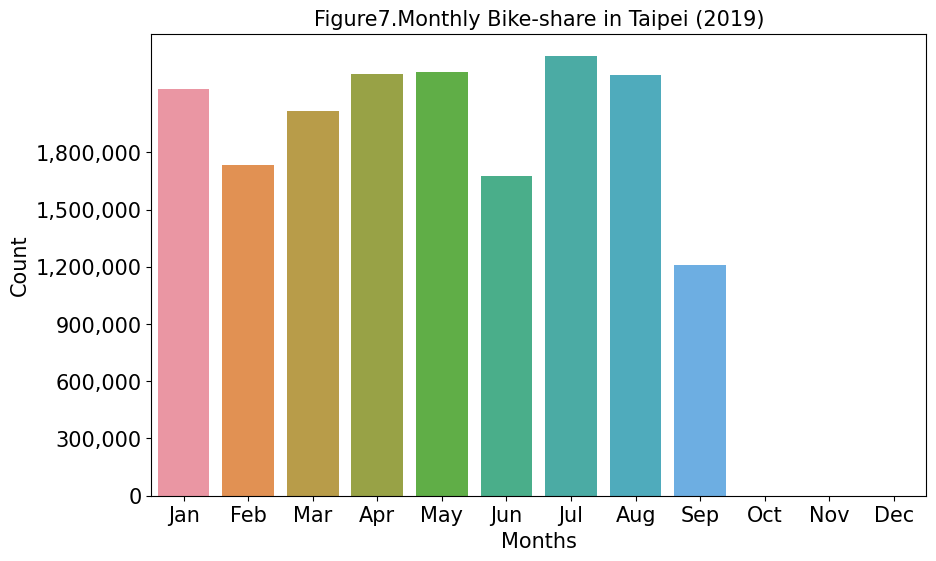

In [18]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df2.index,y='2019',data=df2)
ax.set_title('Figure7.Monthly Bike-share in Taipei (2019)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Months', fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=15)
plt.yticks([0,300000,600000,900000,1200000,1500000,1800000],["0","300,000","600,000","900,000","1,200,000","1,500,000","1,800,000"],fontsize=15)

Actually, there may be some problems with the dataset, as certain months contain extremely odd data. However, considerations such as maintenance could not be disregarded. When performing data cleansing, large quantities of negative or meaningless values may have contributed to this situation. Despite this, it is not difficult to determine that Taipei residents were more prone to ride bicycles than London residents. The influence of the seasons is negligible, possibly as a result of the year-round tropical climate.

Overall, this visualisation may provide the same amount of information as the one from London.

### 4.2. Daily Bike-share in London

#### 4.2.1. Daily Bike-share in London

It is necessary to determine whether there is a time limit for bike-share usage.(usually used when people go to work or go home). Consequently, evaluating the dataset against the hypothesis is required.

In [32]:
london_2017.groupby("hour")["hour"].count()

hour
00      90800
01      60045
02      39056
03      26642
04      21770
05      40144
06     176959
07     552781
08    1060599
09     604997
10     378590
11     408374
12     501986
13     519552
14     510612
15     542175
16     667186
17    1040766
18     933343
19     563087
20     361182
21     250244
22     196833
23     137899
Name: hour, dtype: int64

In [33]:
london_2018.groupby("hour")["hour"].count()

hour
00      89535
01      59038
02      38850
03      26125
04      21668
05      38837
06     178126
07     537942
08    1061010
09     611429
10     379224
11     406159
12     494196
13     509853
14     499244
15     530610
16     668565
17    1071896
18     962838
19     576303
20     372595
21     267251
22     208370
23     140004
Name: hour, dtype: int64

In [34]:
london_2019.groupby("hour")["hour"].count()

hour
00      81651
01      52248
02      32941
03      23534
04      22190
05      38778
06     180978
07     544326
08    1077852
09     617178
10     378918
11     403683
12     493947
13     507598
14     493022
15     525642
16     665587
17    1053410
18     940785
19     561103
20     359640
21     250433
22     194414
23     129640
Name: hour, dtype: int64

In [35]:
london_2020.groupby("hour")["hour"].count()

hour
00     55500
01     34347
02     19759
03     12739
04     11329
05     21534
06     93269
07    241686
08    394327
09    280744
10    247170
11    301820
12    385774
13    427019
14    441951
15    469898
16    529026
17    658651
18    626767
19    443886
20    300461
21    202950
22    143968
23     92207
Name: hour, dtype: int64

In [3]:
hours=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
df4=pd.DataFrame(hours,index=hours)
df4["2017"]=[90800,60045,39056,26642,21770,40144,176959,552781,1060599,604997,378590,408374,501986,519552,510612,542175,667186,1040766,933343,563087,361182,250244,196833,137899]
df4["2018"]=[89535,59038,38850,26125,21668,38837,178126,537942,1061010,611429,379224,406159,494196,509853,499244,530610,668565,1071896,962838,576303,372595,267251,208370,140004]
df4["2019"]=[81651,52248,32941,23534,22190,38778,180978,544326,1077852,617178,378918,403683,493947,507598,493022,525642,665587,1053410,940785,561103,359640,250433,194414,129640]
df4["2020"]=[55500,34347,19759,12739,11329,21534,93269,241686,394327,280744,247170,301820,385774,427019,441951,469898,529026,658651,626767,443886,300461,202950,143968,92207]

([<matplotlib.axis.YTick at 0x1f4024f19a0>,
 [Text(0, 0, '0'),
  Text(0, 200000, '200,000'),
  Text(0, 400000, '400,000'),
  Text(0, 600000, '600,000'),
  Text(0, 800000, '800,000'),
  Text(0, 1000000, '1,000,000')])

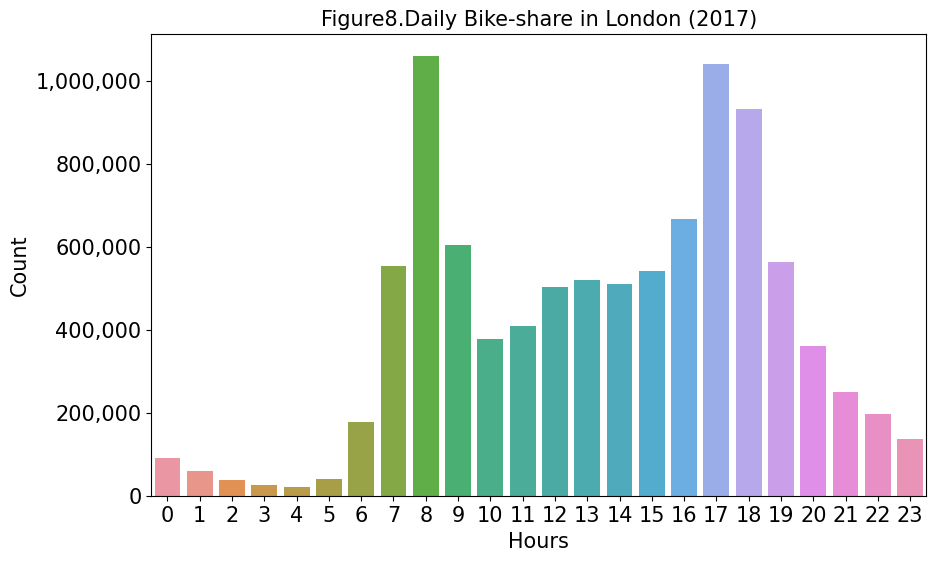

In [39]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df4.index,y='2017',data=df4)
ax.set_title('Figure8.Daily Bike-share in London (2017)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Hours', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([0,200000,400000,600000,800000,1000000],["0","200,000","400,000","600,000","800,000","1,000,000"],fontsize=15)

([<matplotlib.axis.YTick at 0x2b1a77cc850>,
 [Text(0, 0, '0'),
  Text(0, 200000, '200,000'),
  Text(0, 400000, '400,000'),
  Text(0, 600000, '600,000'),
  Text(0, 800000, '800,000'),
  Text(0, 1000000, '1,000,000')])

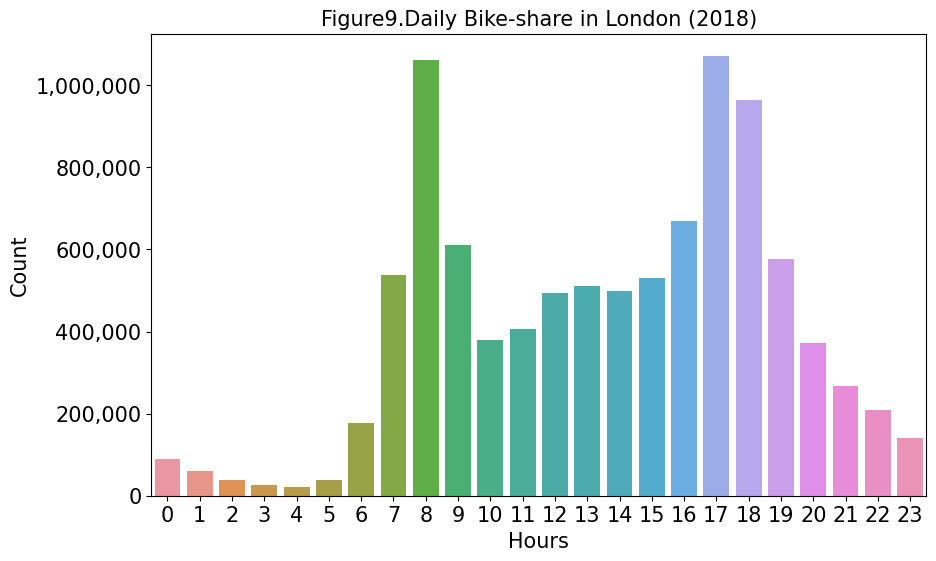

In [4]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df4.index,y='2018',data=df4)
ax.set_title('Figure9.Daily Bike-share in London (2018)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Hours', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([0,200000,400000,600000,800000,1000000],["0","200,000","400,000","600,000","800,000","1,000,000"],fontsize=15)

([<matplotlib.axis.YTick at 0x2b1a7fab250>,
 [Text(0, 0, '0'),
  Text(0, 200000, '200,000'),
  Text(0, 400000, '400,000'),
  Text(0, 600000, '600,000'),
  Text(0, 800000, '800,000'),
  Text(0, 1000000, '1,000,000')])

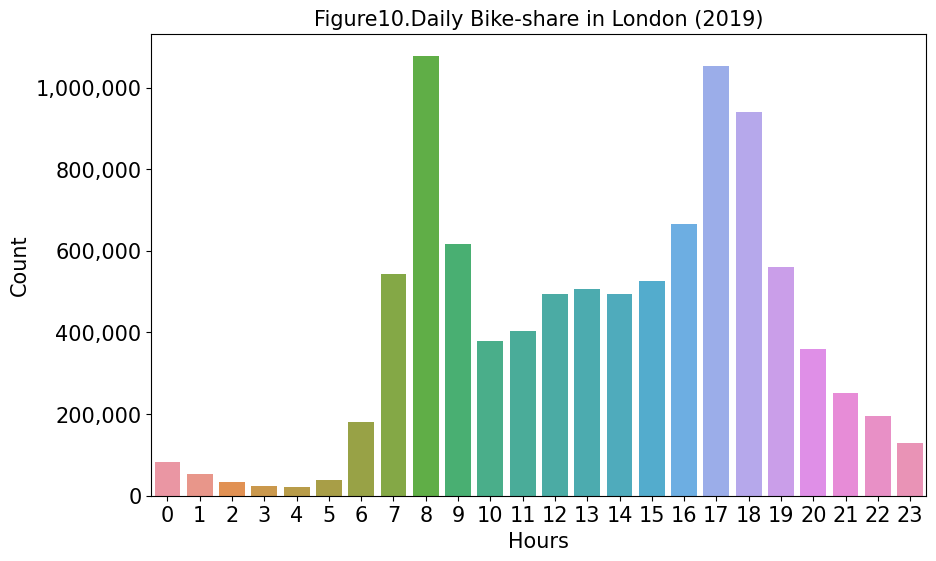

In [5]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df4.index,y='2019',data=df4)
ax.set_title('Figure10.Daily Bike-share in London (2019)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Hours', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([0,200000,400000,600000,800000,1000000],["0","200,000","400,000","600,000","800,000","1,000,000"],fontsize=15)

([<matplotlib.axis.YTick at 0x2b1a80a8ca0>,
 [Text(0, 0, '0'),
  Text(0, 200000, '200,000'),
  Text(0, 400000, '400,000'),
  Text(0, 600000, '600,000'),
  Text(0, 800000, '800,000'),
  Text(0, 1000000, '1,000,000')])

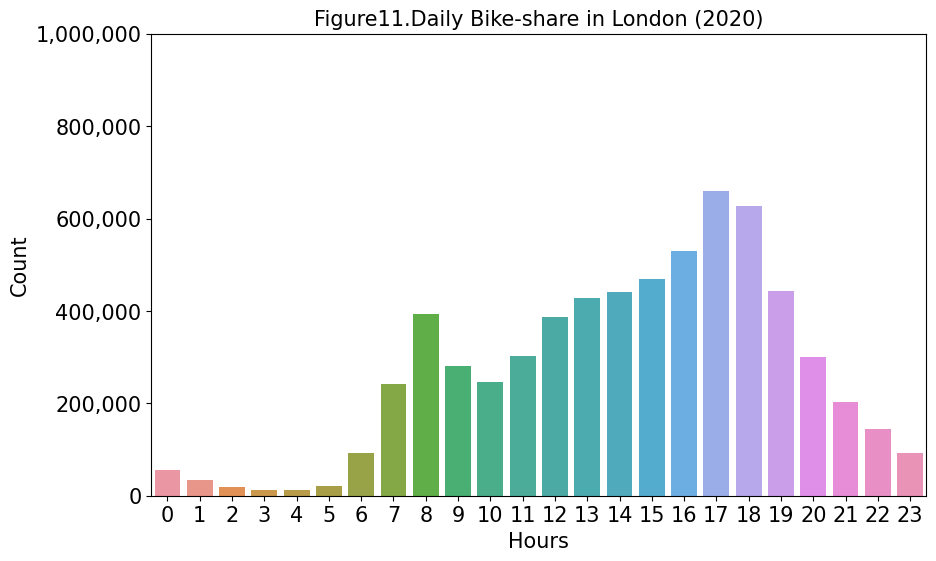

In [6]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df4.index,y='2020',data=df4)
ax.set_title('Figure11.Daily Bike-share in London (2020)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Hours', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([0,200000,400000,600000,800000,1000000],["0","200,000","400,000","600,000","800,000","1,000,000"],fontsize=15)

Typically, peak hour is easy to spot.The busy hours were from 8 a.m. to 6 p.m. Data collected in the three years prior to COVID-19 indicate that citizens adhered to a policy mandating the use of communal bicycles for commuting purposes. The previous three years have shown little variation from one another.
However, as a result of COVID-19, bike-share utilisation decreased dramatically, as reflected by the 8 a.m. peak hour. Due to the lockdown, people avoided venturing outside, even to go to work. In addition, bike-share is something that is distributed to the crowd, which facilitates the transmission of disease.

#### 4.2.2. Daily Bike-share in Taipei

In [13]:
taipei_2017.groupby("hour")["hour"].count()

hour
0      287181
1      149498
2       90667
3       63125
4       62853
5      122513
6      333704
7      768376
8     1092022
9      794344
10     641679
11     692083
12     875005
13     818819
14     778017
15     815627
16    1055571
17    1528529
18    1622075
19    1161377
20     977602
21    1037391
22     759991
23     436545
Name: hour, dtype: int64

In [14]:
taipei_2018.groupby("hour")["hour"].count()

hour
0      323534
1      170474
2      103998
3       72640
4       74730
5      147353
6      424208
7     1016183
8     1422676
9      992164
10     782717
11     837688
12    1050910
13     968991
14     926877
15    1008886
16    1303555
17    1897993
18    2022356
19    1389869
20    1153069
21    1218814
22     878454
23     496449
Name: hour, dtype: int64

In [15]:
taipei_2019.groupby("hour")["hour"].count()

hour
0      260950
1      128066
2       80647
3       57018
4       60119
5      131314
6      378466
7      916331
8     1284890
9      896642
10     689409
11     732264
12     887480
13     809273
14     755407
15     809102
16    1085694
17    1591775
18    1742216
19    1222126
20    1007974
21    1036440
22     747137
23     407015
Name: hour, dtype: int64

In [25]:
hours=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
df3=pd.DataFrame(hours,index=hours)
df3["2017"]=[287181,149498,90667,63125,62853,122513,333704,768376,1092022,794344,641679,692083,875005,818819,778017,815627,1055571,1528529,1622075,1161377,977602,1037391,759991,436545]
df3["2018"]=[323534,170474,103998,72640,74730,147353,424208,1016183,1422676,992164,782717,837688,1050910,968991,926877,1008886,1303555,1897993,2022356,1389869,1153069,1218814,878454,496449]
df3["2019"]=[260950,128066,80647,57018,60119,131314,378466,916331,1284890,896642,689409,732264,887480,809273,755407,809102,1085694,1591775,1742216,1222126,1007974,1036440,747137,407015]

([<matplotlib.axis.YTick at 0x1f57dcf7e50>,
 [Text(0, 0, '0'),
  Text(0, 400000, '400,000'),
  Text(0, 800000, '800,000'),
  Text(0, 1200000, '1,200,000'),
  Text(0, 1600000, '1,600,000')])

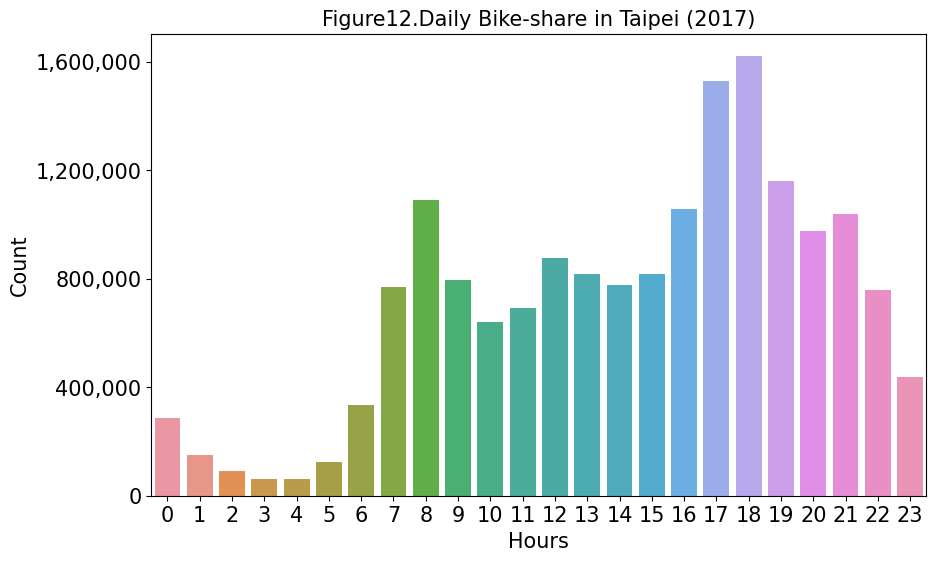

In [28]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df3.index,y='2017',data=df3)
ax.set_title('Figure12.Daily Bike-share in Taipei (2017)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Hours', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([0,400000,800000,1200000,1600000],["0","400,000","800,000","1,200,000","1,600,000"],fontsize=15)

([<matplotlib.axis.YTick at 0x1f59a018c70>,
 [Text(0, 0, '0'),
  Text(0, 400000, '400,000'),
  Text(0, 800000, '800,000'),
  Text(0, 1200000, '1,200,000'),
  Text(0, 1600000, '1,600,000')])

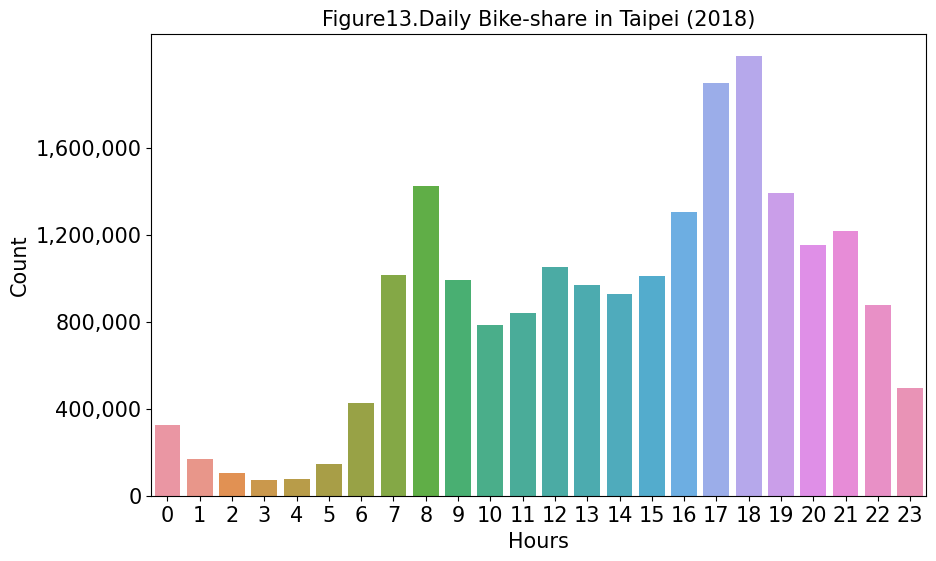

In [29]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df3.index,y='2018',data=df3)
ax.set_title('Figure13.Daily Bike-share in Taipei (2018)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Hours', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([0,400000,800000,1200000,1600000],["0","400,000","800,000","1,200,000","1,600,000"],fontsize=15)

([<matplotlib.axis.YTick at 0x1f59a114c10>,
 [Text(0, 0, '0'),
  Text(0, 400000, '400,000'),
  Text(0, 800000, '800,000'),
  Text(0, 1200000, '1,200,000'),
  Text(0, 1600000, '1,600,000')])

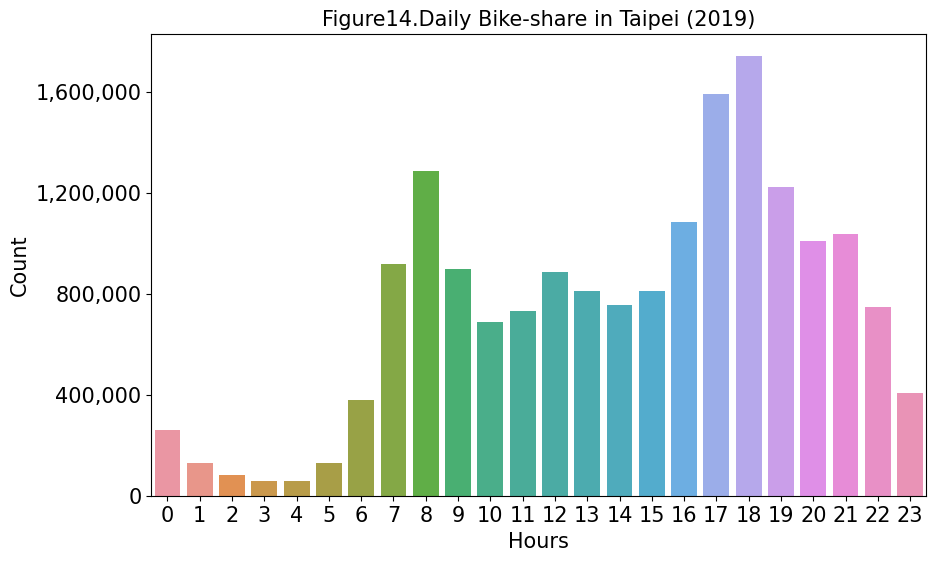

In [30]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df3.index,y='2019',data=df3)
ax.set_title('Figure14.Daily Bike-share in Taipei (2019)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Hours', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([0,400000,800000,1200000,1600000],["0","400,000","800,000","1,200,000","1,600,000"],fontsize=15)

In contrast to the monthly time series, the daily data from Taipei revealed a significant trend.
From the aforementioned images, it is easy to determine which period represents rush hour.The prime hours were 8 a.m. and 5 p.m. to 6 p.m. As previously stated, individuals typically ride shared bikes to and from work and home. From 11 p.m. to 6 a.m. the following morning, the utilisation is minimal.

#### 4.2.3. Duration Distribution in London

For the visualization, the data with duration more than one hour would be excluded.

In [7]:
#london_2017=pd.read_csv(r'C:\Users\doudou\Desktop\Dataset\london_2017.csv')
#london_2018=pd.read_csv(r'C:\Users\doudou\Desktop\Dataset\london_2018.csv')
#london_2019=pd.read_csv(r'C:\Users\doudou\Desktop\Dataset\london_2019.csv')
#london_2020=pd.read_csv(r'C:\Users\doudou\Desktop\Dataset\london_2020.csv')

In [36]:
london_2017=london_2017[london_2017["duration"]<3600]
london_2018=london_2018[london_2018["duration"]<3600]
london_2019=london_2019[london_2019["duration"]<3600]
london_2020=london_2019[london_2019["duration"]<3600]

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

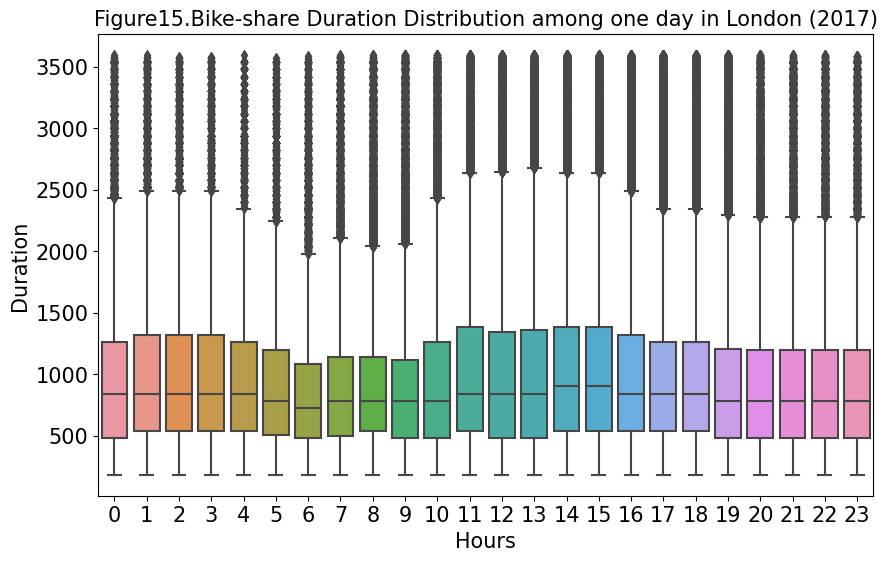

In [8]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=london_2017["hour"],y=london_2017["duration"])
ax.set_title('Figure15.Bike-share Duration Distribution among one day in London (2017)', fontsize=15)
ax.set_ylabel('Duration', fontsize=15)
ax.set_xlabel('Hours', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

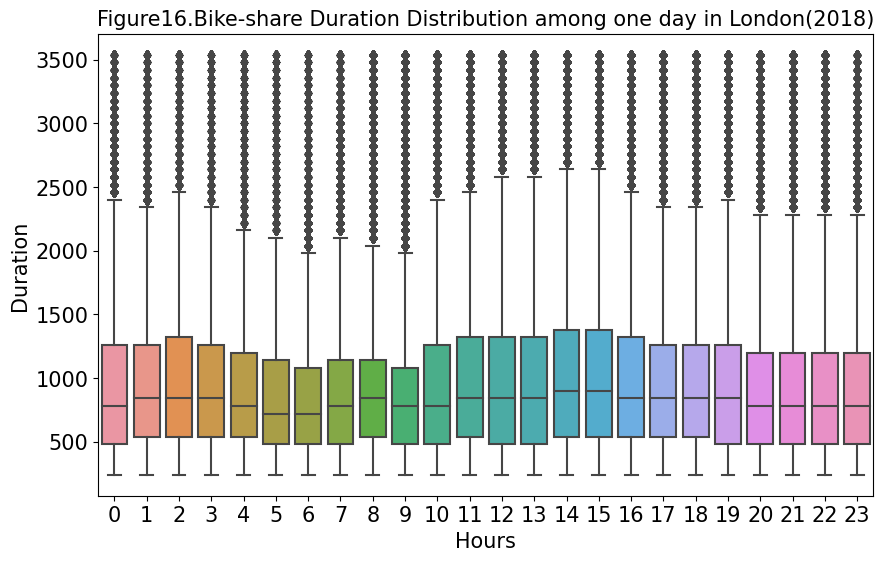

In [9]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=london_2018["hour"],y=london_2018["duration"])
ax.set_title('Figure16.Bike-share Duration Distribution among one day in London(2018)', fontsize=15)
ax.set_ylabel('Duration', fontsize=15)
ax.set_xlabel('Hours', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

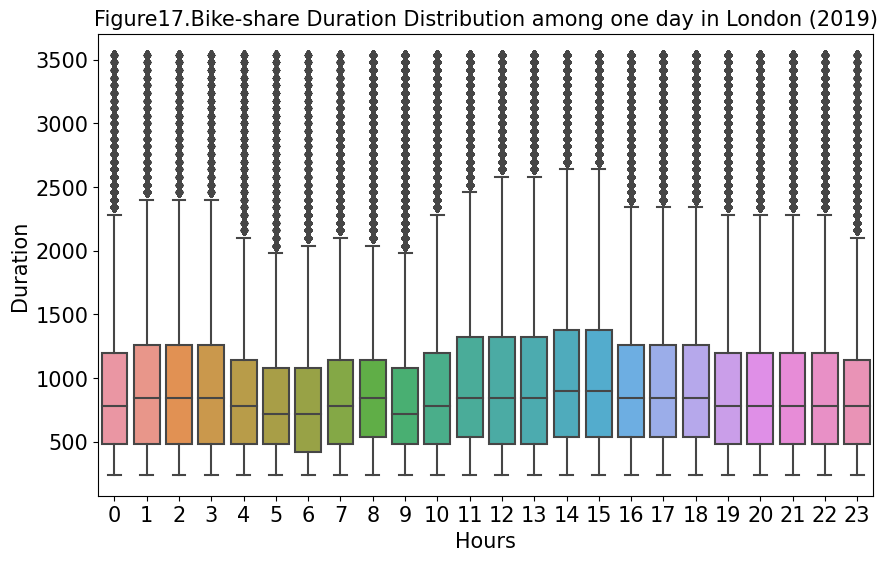

In [10]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=london_2019["hour"],y=london_2019["duration"])
ax.set_title('Figure17.Bike-share Duration Distribution among one day in London (2019)', fontsize=15)
ax.set_ylabel('Duration', fontsize=15)
ax.set_xlabel('Hours', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

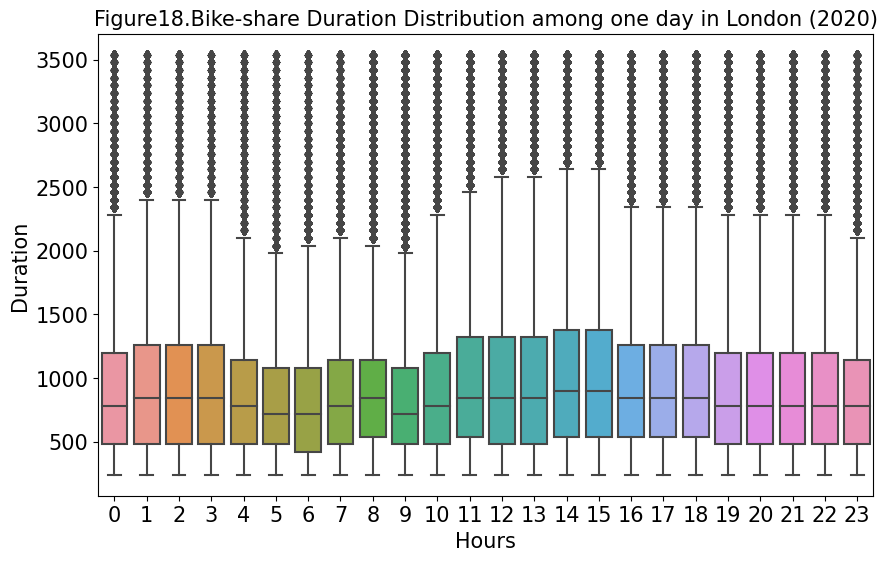

In [11]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=london_2020["hour"],y=london_2020["duration"])
ax.set_title('Figure18.Bike-share Duration Distribution among one day in London (2020)', fontsize=15)
ax.set_ylabel('Duration', fontsize=15)
ax.set_xlabel('Hours', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

Taking into account the duration distribution, there is no discernible difference between the numerous hours. Londoners spent about a quarter more time on the road than their Taipei counterparts, which contributed to the phenomenon. In terms of convenience, there may not be enough bike-share stations in London. Even during COVID-19, there is no indication that the residents who have always travelled a great distance will reduce their cycling time.
In addition, the extreme data of duration is significantly less than the prediction, and even though they contributed to the mean value, the audience still viewed bicycle riding as a method of labour rather than a leisure activity.

#### 4.2.4. Duration Distribution in Taipei

In [38]:
taipei_2017=taipei_2017[taipei_2017["duration"]<3600]
taipei_2018=taipei_2018[taipei_2018["duration"]<3600]
taipei_2019=taipei_2019[taipei_2019["duration"]<3600]

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

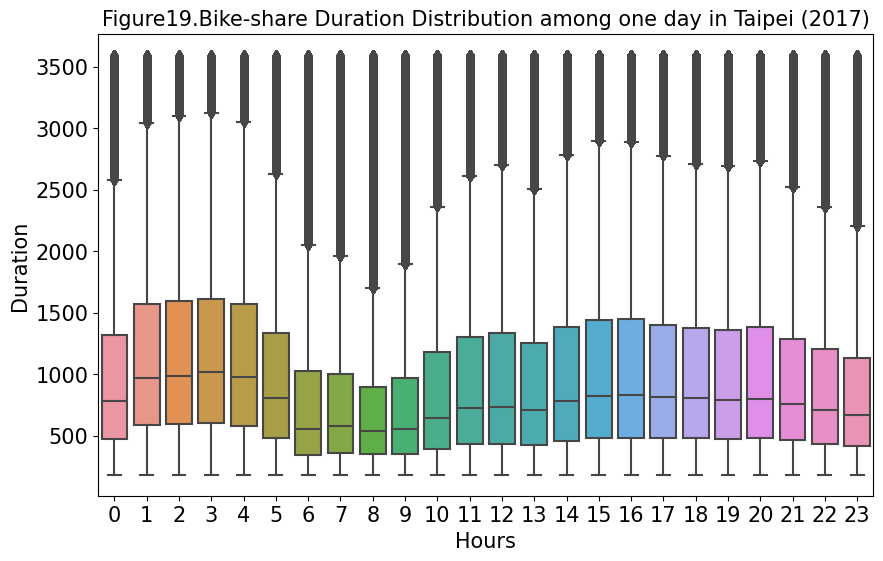

In [41]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=taipei_2017["hour"],y=taipei_2017["duration"])
ax.set_title('Figure19.Bike-share Duration Distribution among one day in Taipei (2017)', fontsize=15)
ax.set_ylabel('Duration', fontsize=15)
ax.set_xlabel('Hours', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

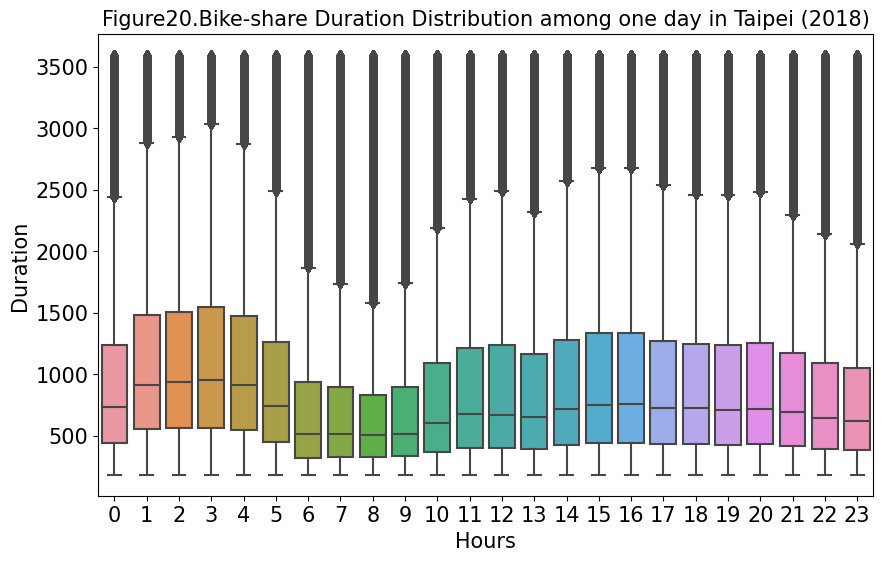

In [42]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=taipei_2018["hour"],y=taipei_2018["duration"])
ax.set_title('Figure20.Bike-share Duration Distribution among one day in Taipei (2018)', fontsize=15)
ax.set_ylabel('Duration', fontsize=15)
ax.set_xlabel('Hours', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

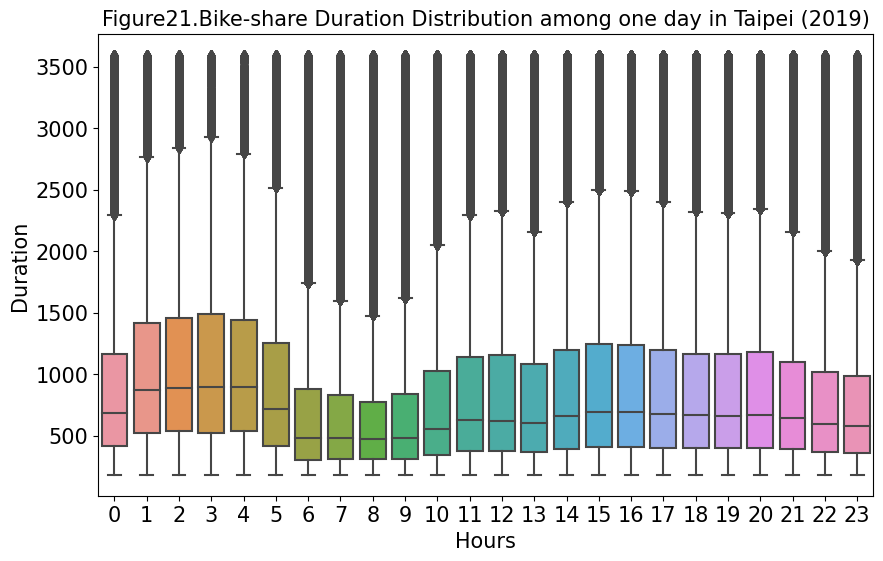

In [44]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=taipei_2019["hour"],y=taipei_2019["duration"])
ax.set_title('Figure21.Bike-share Duration Distribution among one day in Taipei (2019)', fontsize=15)
ax.set_ylabel('Duration', fontsize=15)
ax.set_xlabel('Hours', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

Similar to the daily time series, the one-day extent of bike-share usage in Taipei revealed a significant trend.
In terms of the median value separately, it is undeniable that 8 a.m. cyclists have the shortest travel time, while midnight cyclists have the longest travel time, which is odd but may be attributed to night employees.
On the other hand, three graphs may clarify that most locals only borrow bicycles for more than ten minutes in order to get to and from work and home, rather than out of any sort of cycling enthusiasm. This theory might fit with the earlier plots that showed 8 a.m. to be the busiest time for bike-share users.

### 4.3. Comparison

#### 4.3.1. Homogeneity 

First, it was evident from the twenty-one charts above that the work is the most important factor regardless of where one lives, East or West. It's a global law that rush hour begins at 8 a.m. and ends between 5 and 6 p.m.
Second, the residents of these two cities become accustomed to bike-share and continue their regular utilization, which could be included in bike-share's daily usage.
Thirdly, these two cities have an extensive use of bike-share, with over 800 stations in each.

#### 4.3.2. Heterogeneity

Aside from their homogeneity, the two cities are quite distinct.
The climate change has the greatest impact on the British propensity to use bike-sharing services. As the temperature rises, they wish to play outside, but as winter approaches, they rapidly abandon the idea. People in Taipei, on the other hand, can cycle in any weather due to the mild climate.
In addition, residents of Taipei are more likely to utilise the bike-share system, despite its short duration and high utilisation rate. It may be associated with the collectivism of Asian culture, which would make sharing more acceptable.
While late-night bike-share utilisation may seem promising, it's important to consider whether this is because workers are commuting home on bikes to save money or because young people are out partying.

## 5.Conclusion and Discussion


### 5.1. Conclusion 

This article contrasts two cities' datasets by cherry-picking the most pertinent information to analyze, as opposed to concentrating on linear regression models or the geographic distribution of bike-share stations. In order to put the trend of datasets into perspective, potential confounding variables would be discussed at length.

As evidenced by the above data and graphs from London in 2020, COVID-19 had a significant impact on bike-share usage. Fear of being handled by others, falling victim to a virus, and being restricted by a lockdown all contributed to the dramatic decline in bike-share usage. Uncertain if the scale of utilisation would return to normal, but since COVID-19 disappears gradually, the majority of people would return to their previous lives.

Londoners spent a quarter of a day more travelling than their Taiwanese counterparts, which contributed to the problem. It's conceivable that London's bike-share stations are too far apart for most people's convenience. There is no indication that long-distance travelers, even during COVID-19, will cut their trips short.

One imperfection is that the dataset cannot predict the future trend of the bike-share system. According to the records, inhabitants who are accustomed to bike-share would use it, but those who do not need it would not give it a try, resulting in a stable number of users.

Since this is a comparison between a European city and an Oriental city, it is certain that Taipei residents would provide more bike-share data in a shorter amount of time. Taipei is a dynamic city with a higher population density than London, as indicated by the records.

Nonetheless, residents in various cities could share the same daily routine, which indicates that in this era, cities or countries would gradually converge. Rush hour begins at 8:00 a.m. and ends between 5:00 and 6:00 p.m., which is the international default rule.

Interesting things are that the greatest influence on the British propensity to use bike-sharing systems is climate change. They are eager to play outside when the weather is warm but quickly lose interest once winter sets in. However, because of Taipei's mild temperature, residents can ride bicycles year-round. 

In conclusion, this article mainly is focused on the exploratory analysis, there is no certain topic of the whole procedure. As long as there exists some findings, they would be included in the final conclusions. It was a wonderful experience of manipulating such large amounts of data sources, which I appreciated a lot.

### 5.2. Discussion

The entire paper contains errors, however.

Above all, this is an exploratory research, which means the author independently selected the methodology. Using large amounts of data, the author attempted to identify intriguing data distributions, but the endeavour was not entirely focused.

Moreover, the method for excluding negative records and outliners appeared arbitrary, and the application of a formula or some references should have been carefully considered.

Also, the article lacks linear models, spatial analysis, and machine learning, making it a subpar example of data science.

Last, the selected dataset is too large and underutilised; the datasets have great potential value, but due to the author's unfamiliarity with python, a great deal of valuable information was discarded.

### 5.3. Future Plans

1.The spatial analysis merits investigation, as both datasets contain numerous stations. The distribution of stations would unquestionably disclose the prosperity of various urban areas. With thousands of stations lacking latitudes and a lack of local land value, it is a real mission of Heracris.

2.The explanations for the long-term nocturnal usage of bike-share in Taipei, which is an intriguing phenomenon but merits consideration.

3.More data from Northern Europe's bike-share programmes are needed, as the region has some of the highest per capita bicycle commuting rates in the globe.  

4.The difference between commercial bike-share and the bike-share systems built by government deserves investigating.

## References

Bachand-Marleau, J., Lee, B. H., & El-Geneidy, A. M.(2012). Better understanding of factors influencing likelihood of using shared bicycle systems and frequency of use. _Transportation Research Record_. 2314 (01), pp.66–71.

DeMaio.P.(2009). Bike-sharing: History, Impacts, Models of Provision, and Future. _Journal of Public Transportation_. 12(04), pp.41-56.

Eren, E., and V. E. Uz.(2019).A Review on Bike-sharing: The Factors Affecting Bike-sharing Demand._Sustainable Cities 
and Society_. 101882. 

Henriksson, M., & Scalzotto, J. G.(2023). Bike-sharing under pressure: The role of cycling in building circular cycling futures. _Journal of Cleaner Production_. 395, pp. 1-8.

Martin, C. J., Upham, P., & Budd, L.(2015). Commercial orientation in grassroots social innovation: Insights from the sharing economy. _Ecological Economics_, 118, pp.240–251. 

Rixey, R. A.(2013). Station-Level Forecasting of Bikesharing Ridership: Station Network Effects in Three U.S. Systems. _Transportation Research Record_. 2387 (1), pp.46–55.